In [1]:
import numpy as np
import pandas as pd
import healpy as hp
import h5py
import glob
import time

import matplotlib.pyplot as plt

from astropy.io import fits
from astropy.wcs import WCS
from astropy import units as u
from astropy.coordinates import SkyCoord

%matplotlib inline

In [5]:
# different image location
# images =glob.glob("fits/*.fits")

# Different location 
beam_file = "/home/kuiack/AARTFAAC_beamsim/LBAOUTER_AARTFAAC_beamshape_60MHz.hdf5"
beam_model = np.array(h5py.File(beam_file).get('lmbeamintensity_norm'))

In [26]:
# A6 

meshx, meshy = np.meshgrid(np.linspace(0,1023,1024),np.linspace(0,1023,1024))


In [6]:
# A12

import scipy.ndimage

meshx, meshy = np.meshgrid(np.linspace(0,2100,2100),
                           np.linspace(0,2100,2100))

beam_model = scipy.ndimage.zoom(beam_model, 2.05078125, order=3)

In [8]:
image_list = sorted(glob.glob("/home/kuiack/A12_frames/*"))[::10]
image_list = np.append(image_list,sorted(glob.glob("/mnt/ads001/A12_slices/slices/*.fits"))[:-1])

print len(image_list)
# for i in image_list:
#     print i



119


In [12]:
NSIDE = 256

hp_index = np.arange(hp.nside2npix(NSIDE))

In [14]:

sky_map = pd.DataFrame({"idotw":np.zeros(len(hp_index)), 
                        "i":np.zeros(len(hp_index)),
                        "w":np.zeros(len(hp_index)), 
                        "n":np.zeros(len(hp_index))}, index = hp_index )



n = 1
for _img in image_list:
    t1 = time.time()
    
    image_wcs = WCS(_img)
    tmp_img = np.array(fits.open(_img)[0].data[0,0,:,:],dtype=np.float)
    ra, dec,notused, nnotused = image_wcs.wcs_pix2world(meshx,meshy,1,1,1)
    
    index = (np.isfinite(tmp_img) & np.isfinite(dec) & np.isfinite(ra) & (beam_model != 0.0))
    
    pix_index = hp.pixelfunc.ang2pix(NSIDE,ra[index],dec[index],lonlat=True)    
    
    
    
    sky_map.at[pix_index, "idotw"] = sky_map.iloc[pix_index]["idotw"] + tmp_img[index]*beam_model[index]
    sky_map.at[pix_index, "i"] = sky_map.iloc[pix_index]["i"] + tmp_img[index]
    sky_map.at[pix_index, "w"] = sky_map.iloc[pix_index]["w"] + beam_model[index]
    sky_map.at[pix_index, "n"] = sky_map.iloc[pix_index]["n"] +  np.ones(len(beam_model[index]))
    print n,"/", len(image_list), time.time() - t1
    n += 1

hp.write_map("/home/kuiack/A12_map.fits", (sky_map["idotw"]/sky_map["w"]))

1 / 119 3.76077103615
2 / 119 3.78160595894
3 / 119 3.78754997253
4 / 119 3.64736604691
5 / 119 3.63998794556
6 / 119 3.59731507301
7 / 119 3.62156796455
8 / 119 3.58460307121
9 / 119 3.61351013184
10 / 119 3.5400800705
11 / 119 3.64136195183
12 / 119 3.52053904533
13 / 119 3.53159117699
14 / 119 3.41031599045
15 / 119 3.5424258709
16 / 119 3.43916606903
17 / 119 3.51808810234
18 / 119 3.39346003532
19 / 119 3.49504303932
20 / 119 3.38515710831
21 / 119 3.45900201797
22 / 119 3.45914721489
23 / 119 3.44282913208
24 / 119 3.47117090225
25 / 119 3.49272918701
26 / 119 3.48417687416
27 / 119 3.56091403961
28 / 119 3.55927395821
29 / 119 3.51837205887
30 / 119 3.53299403191
31 / 119 3.53146696091
32 / 119 3.53076314926
33 / 119 3.51857018471
34 / 119 3.50563097
35 / 119 3.47094202042
36 / 119 3.48225998878
37 / 119 3.49235582352
38 / 119 3.50011110306
39 / 119 3.7290968895
40 / 119 3.63474607468
41 / 119 3.48121595383
42 / 119 3.51744699478
43 / 119 3.55198597908
44 / 119 3.65623998642
45 

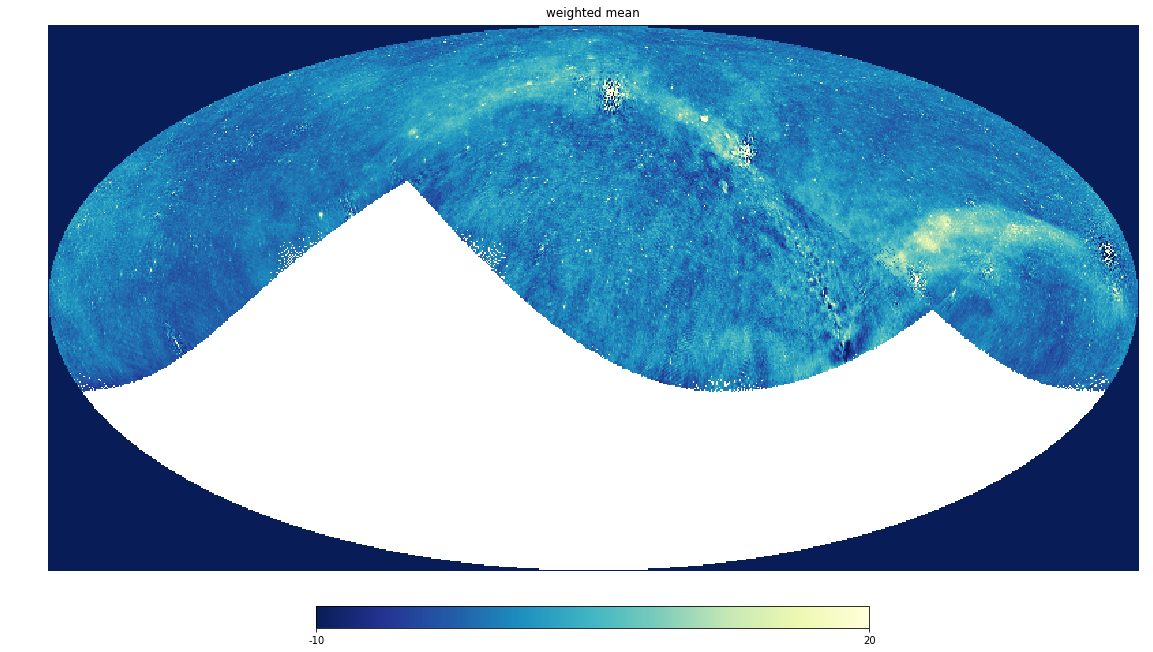

In [15]:
m = (sky_map["idotw"]/sky_map["w"])
plt.figure(1, figsize=(16,10))
hp.mollview(m, min=-10,max=20, cmap="YlGnBu_r", title="weighted mean", fig=1)

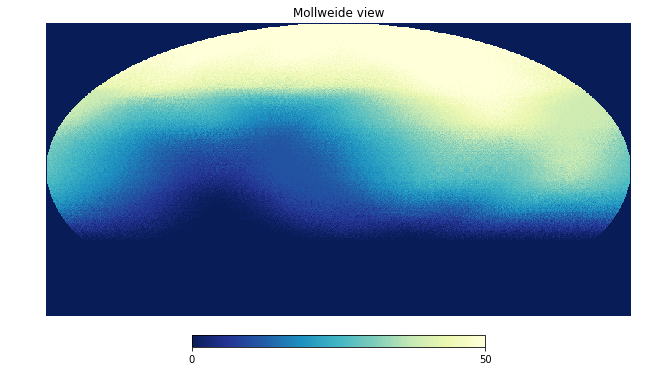

In [151]:
hp.mollview(sky_map["n"], cmap="YlGnBu_r")

In [175]:
hp.mollview?

In [176]:
image_list

['/data/ASf_20190127-2/2019-01-26T13:59:27-S316.5-B8.fits',
 '/data/ASf_20190127-2/2019-01-27T00:18:45-S316.5-B8.fits',
 '/data/ASf_20190127-2/2019-01-27T00:35:32-S316.5-B8.fits',
 '/data/ASf_20190127-2/2019-01-27T00:52:18-S316.5-B8.fits',
 '/data/ASf_20190127-2/2019-01-27T01:09:05-S316.5-B8.fits',
 '/data/ASf_20190127-2/2019-01-27T01:25:52-S316.7-B8.fits',
 '/data/ASf_20190127-2/2019-01-27T01:42:38-S316.5-B8.fits',
 '/data/ASf_20190127-2/2019-01-27T01:59:25-S316.5-B8.fits',
 '/data/ASf_20190127-2/2019-01-27T02:16:12-S316.5-B8.fits',
 '/data/ASf_20190127-2/2019-01-27T02:32:58-S316.5-B8.fits',
 '/data/ASf_20190127-2/2019-01-27T02:49:45-S316.5-B8.fits',
 '/data/ASf_20190127-2/2019-01-27T03:06:31-S316.5-B8.fits',
 '/data/ASf_20190127-2/2019-01-27T03:23:21-S316.5-B8.fits',
 '/data/ASf_20190127-2/2019-01-27T03:40:09-S316.5-B8.fits',
 '/data/ASf_20190127-2/2019-01-27T03:57:03-S316.5-B8.fits',
 '/data/ASf_20190127-2/2019-01-27T04:13:59-S316.5-B8.fits',
 '/data/ASf_20190127-2/2019-01-27T04:30:

In [177]:
hp.write_map("ASf_20190127.fits", m)

In [179]:
pwd

u'/afhome/kuiack/scratchpad/notebooks'